In [135]:
# Import pandas for data manipulation and analysis
import pandas as pd


In [136]:

data = []

# Read the dataset and filter out unnecessary lines
# Lines starting with '@' or '%' are metadata or comments and are ignored
# Empty lines are also ignored to ensure only data entries are processed

with open('dataset.arff', 'r') as dataset_file:
    for line in dataset_file.read().split("\n"):
        if line.startswith('@') or line.startswith('%') or line == "":
            continue
        data.append(line)


In [137]:

columns = []

# Extract column names from the dataset
# '@ATTRIBUTE' marks the start of a column definition in ARFF format files

with open('dataset.arff', 'r') as dataset_file:
    for line in dataset_file.read().split("\n"):
        if line.startswith('@ATTRIBUTE'):
            columns.append(line.split(" ")[1])


In [138]:

# Write the processed data to a CSV file for easy use in data analysis
# This step converts the ARFF file format to a more common CSV format

with open("dataframe.csv", "w") as output_file:
    output_file.write(",".join(columns))
    output_file.write("\n")
    output_file.write("\n".join(data))


In [139]:

# Load the data from the newly created CSV file into a pandas DataFrame
# Explicitly setting the column names ensures consistency with the original data schema

df = pd.read_csv("dataframe.csv")
df.columns = columns


In [140]:
df


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [141]:
# add a column to the dataframe with the target variable as a binary variable (0 or 1)

df['t_win'] = df.round_winner.astype('category').cat.codes


In [142]:
# Display the DataFrame again to check the newly added 't_win' column


In [143]:
import  matplotlib.pyplot as plt
import seaborn
import numpy as np

# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlations on numeric data only
correlations = numeric_df.corr()

# Print the top 25 correlations with 't_win'
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])


t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
ct_money        

In [144]:
selected_columns = []

# Select columns with correlation greater than 0.15

for column in correlations.columns:
    if abs(correlations[column]['t_win']) > 0.15:
        selected_columns.append(column)

df_selected = df[selected_columns]


In [145]:
df_selected


,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


Text(0.5, 0, '')

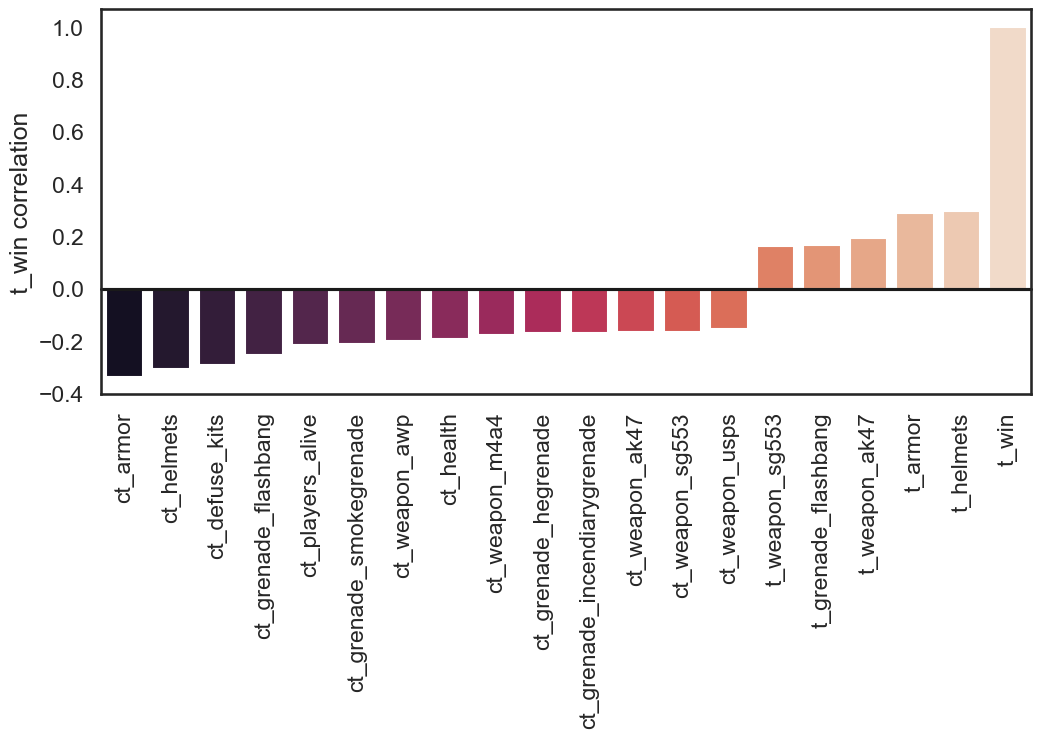

In [146]:

# Plot the barplot of the selected columns to visualize the correlation

seaborn.set_theme(style="white", context="talk")

f, ax = plt.subplots(1, 1, figsize=(12,5), sharex=True)

df_corr = df_selected.corr().sort_values(by="t_win")['t_win']

x = df_corr.index
y = df_corr.values
seaborn.barplot(x=x, y=y, hue=x, palette="rocket", ax=ax)
plt.xticks(rotation=90)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("t_win correlation")
ax.set_xlabel("")

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

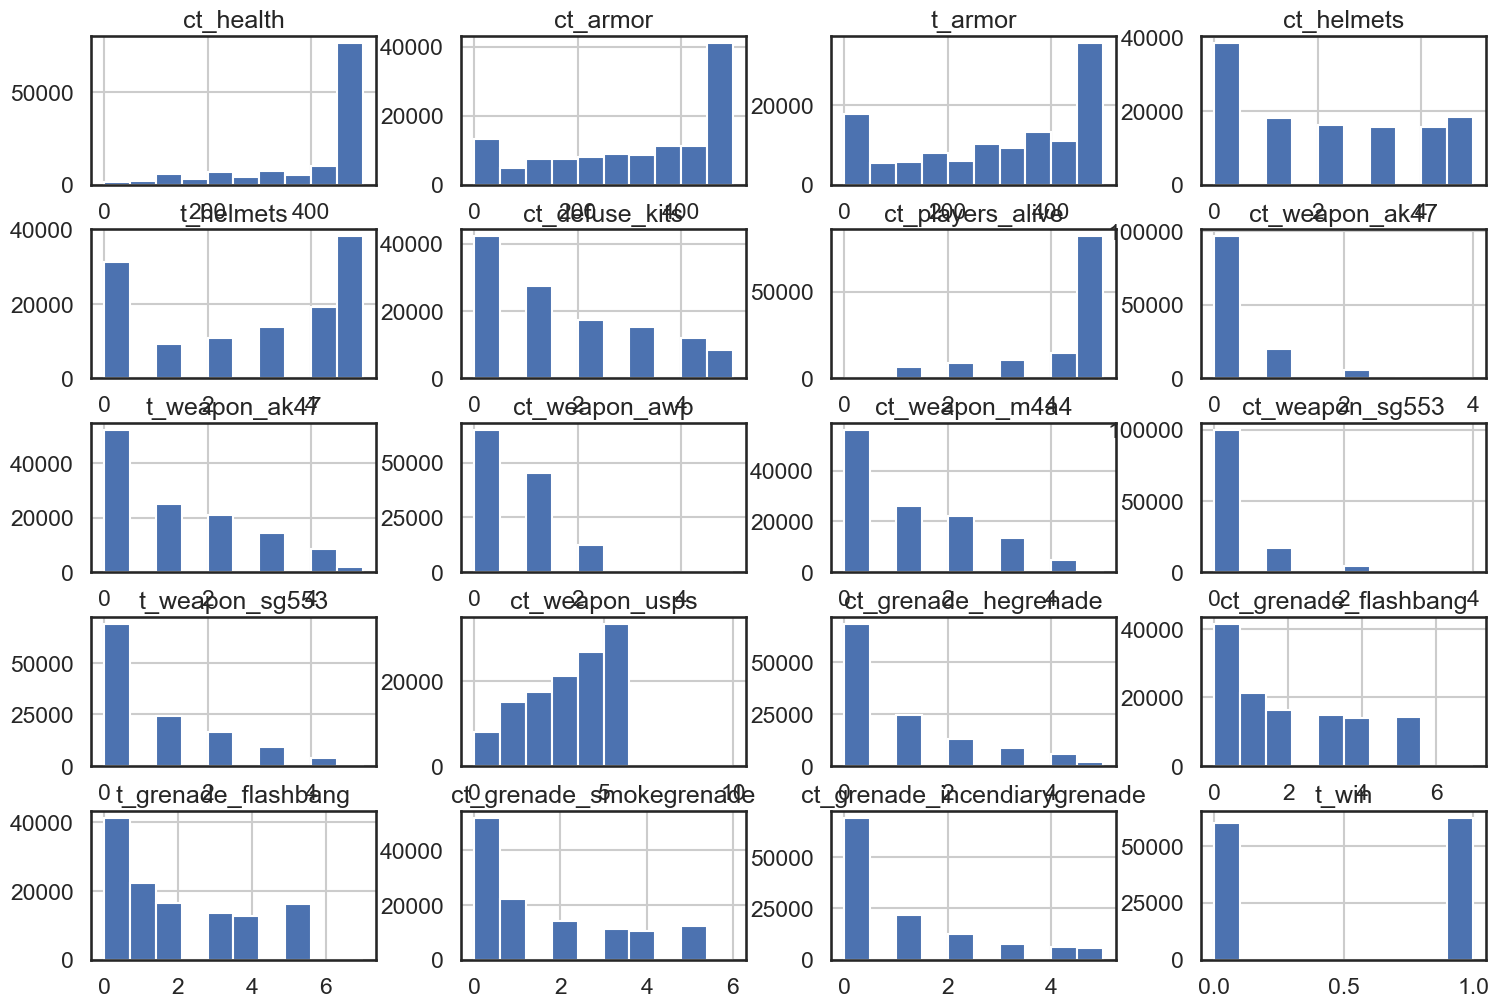

In [147]:

# Plot histograms for each selected feature to understand the distribution of data
# Histograms are helpful for spotting skewness, outliers, and the spread of data

df_selected.hist(figsize=(18, 12))


In [148]:

# Display information about the DataFrame to check data types and non-null counts

df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ct_health                     122410 non-null  float64
 1   ct_armor                      122410 non-null  float64
 2   t_armor                       122410 non-null  float64
 3   ct_helmets                    122410 non-null  float64
 4   t_helmets                     122410 non-null  float64
 5   ct_defuse_kits                122410 non-null  float64
 6   ct_players_alive              122410 non-null  float64
 7   ct_weapon_ak47                122410 non-null  float64
 8   t_weapon_ak47                 122410 non-null  float64
 9   ct_weapon_awp                 122410 non-null  float64
 10  ct_weapon_m4a4                122410 non-null  float64
 11  ct_weapon_sg553               122410 non-null  float64
 12  t_weapon_sg553                122410 non-nul

In [149]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# This is crucial for training the model on one set of data and validating it on an independent set

X, y = df_selected.drop('t_win', axis=1), df_selected['t_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Scale the data to normalize feature scales, improving model performance

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
# Random Forests are effective for handling large data sets with high dimensionality

forest = RandomForestClassifier(n_jobs=4)
forest.fit(X_train_scaled, y_train)


RandomForestClassifier(n_jobs=4)

In [156]:
# Evaluate the Random Forest model

forest.score(X_test_scaled, y_test)

0.8231353647577813